In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
(train_img, train_labels),(test_img, test_labels)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
train_img.shape

(50000, 32, 32, 3)

In [ ]:
labels= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

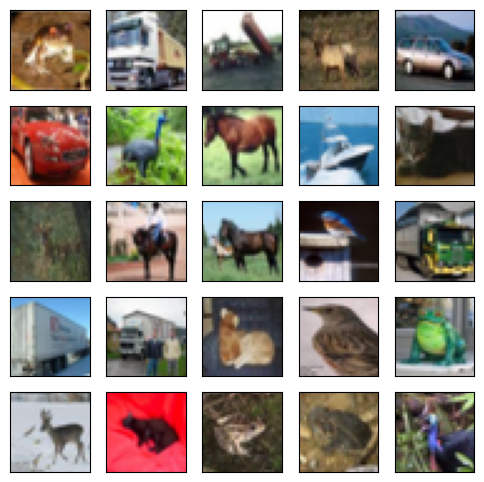

In [ ]:
figure, axes = plt.subplots(5,5, figsize=(6,6), )
k=0
for i in range(5):
  for j in range(5):
    axes[i][j].imshow(train_img[k])
    k+=1
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

<ipython-input-6-472732ad5c8b>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index= int(train_labels[index])


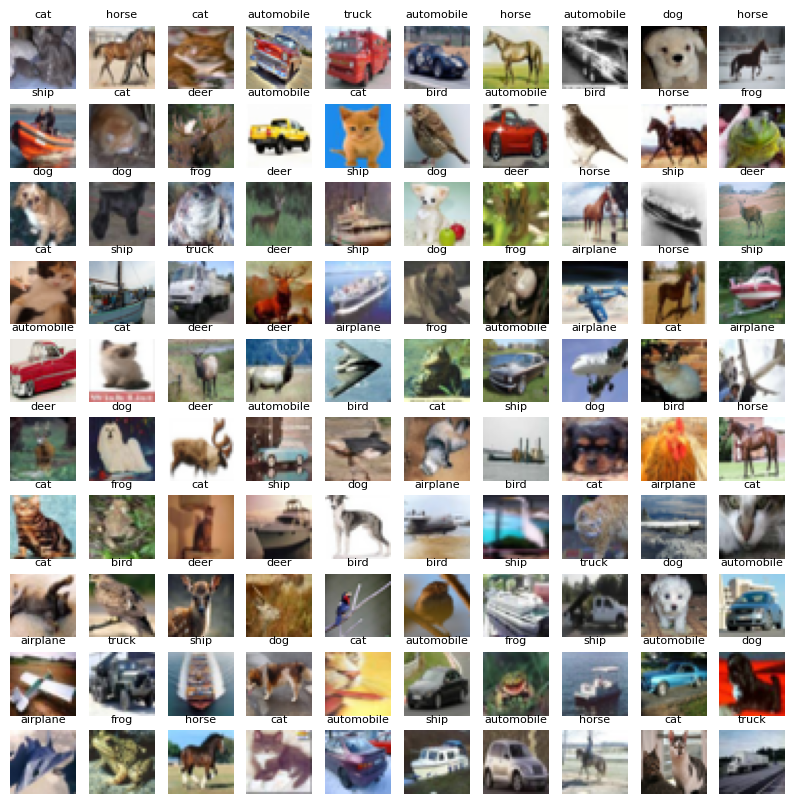

In [ ]:
fig, axes = plt.subplots(10,10,figsize=(10,10))
no_img = len(train_img)
axes = axes.ravel()
for i in np.arange(0, 100):
  index = np.random.randint(0, no_img)
  axes[i].imshow(train_img[index, 1:])
  label_index= int(train_labels[index])
  axes[i].set_title(labels[label_index], fontsize = 8)
  axes[i].axis('off')


In [ ]:
datagen= ImageDataGenerator(rotation_range=30, width_shift_range=0.2, shear_range=0.2, horizontal_flip=True, fill_mode='nearest')
datagen.fit(train_img)

In [ ]:
no_img= len(train_img)
for i in range(0,no_img):
  img= train_img[i].reshape((1,)+train_img[i].shape)
  arg_img=[]
  batches=0
  for batch in datagen.flow(img, batch_size=1):
    arg_img.append(batch)
    batches+=1
    if batches >=5:
      break

In [ ]:
train_img= train_img/225
test_img = test_img/225
train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [ ]:
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
hist= model.fit(train_img, train_labels, epochs=20, batch_size= 32 ,validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 43ms/step - accuracy: 0.2972 - loss: 1.8750 - val_accuracy: 0.5128 - val_loss: 1.3468
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5085 - loss: 1.3604 - val_accuracy: 0.5878 - val_loss: 1.1772
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5875 - loss: 1.1824 - val_accuracy: 0.6300 - val_loss: 1.0520
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6228 - loss: 1.0728 - val_accuracy: 0.6533 - val_loss: 0.9825
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 100s 56ms/step - accuracy: 0.6499 - loss: 1.0007 - val_accuracy: 0.6682 - val_loss: 0.9500
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 65ms/step - accuracy: 0.6740 - loss: 0.9261 - val_accuracy: 0.6723 - val_loss: 0.9528
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 56ms/step - accuracy: 0.6978 - loss: 0.8564 - val_accuracy: 0.6865 - val_loss: 0.9002
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 60ms/step - accuracy: 0.7107 

Text(0.5, 0, 'Epoch')

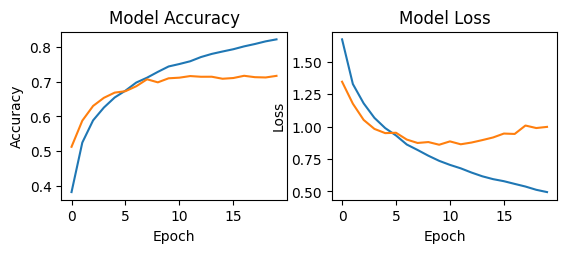

In [ ]:
plt.subplot(2,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(2,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
loss, accuraacy = model.evaluate(test_img, test_labels)
print(f"loss: {loss}")
print(f"accuracy: {accuraacy*100: .2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7119 - loss: 1.0153
loss: 1.0067811012268066
accuracy:  71.12%


In [ ]:
y_pred = model.predict(test_img)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(test_labels,axis = 1)
cm= confusion_matrix(y_true, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


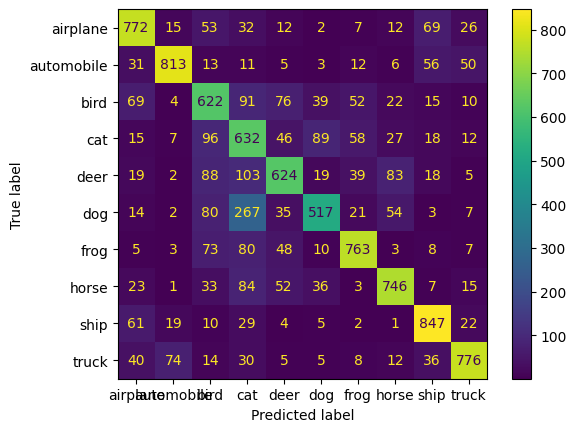

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

 Image 100 is deer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The model predict that image 100 is deer


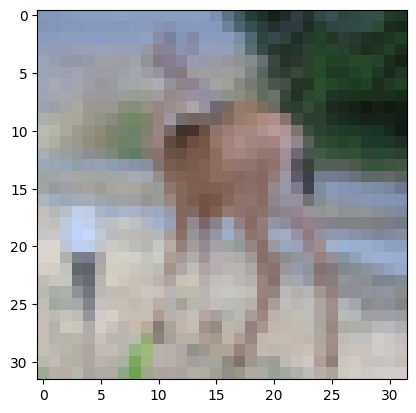

In [ ]:
my_image = test_img[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {labels[y_true[100]]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {labels[pred_100]}")

In [ ]:
json_model = model.to_json()
with open('/content/drive/MyDrive/google colab files/Cifar10_json.json','w') as json_file:
  json_file.write(json_model)
model.save_weights('/content/drive/MyDrive/google colab files/Cifar10.weights.h5')

